In [10]:
import os, re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from collections import Counter
import pandas as pd
from mpl_toolkits import mplot3d

In [2]:
def sep_ponct(my_str, rule = r"([.,?!])"):
    """separer les mots avec les char de ponctuation"""
    #print(my_str)
    sp0 = re.split(rule, my_str)
    sp1 = [data.strip() for data in sp0]
    res = [data for data in sp1 if (data != '') ]
    return res

In [16]:
data=pd.read_csv('data.tsv',sep='\t')
dataQ=data.Question
dataA=data.Answer
Q=[]
A=[]
Q2W=[]# liste de mots pour chaque phrase 
A2W=[]
for i in range(len(dataQ)):
    Q.append(dataQ[i].lower())
for each in Q: 
    each_list = sep_ponct(each)
    remisEsp = ' '.join(each_list)
    Q2W.append(remisEsp.split(" "))
for i in range(len(dataA)):
    A.append(dataA[i].lower())
for each in A:
    each_list = sep_ponct(each)
    remisEsp = ' '.join(each_list)
    A2W.append(remisEsp.split(" "))

In [14]:
#data.describe()

In [5]:
import gensim, logging

In [6]:
window_size=2
N=len(Q2W)
vector_size=3
tout=Q2W+A2W
model=gensim.models.Word2Vec(tout,vector_size=vector_size, window=2, min_count=1, workers=4)

In [7]:
model.wv.get_vector("HI".lower())
def motInconnu(mot):
    try:
        model.wv.get_vector(mot.lower())
    
    except:
         print("Mot inconnu")
motInconnu("HHHHHHHH")

Mot inconnu


In [12]:
V=[]
for i in range (N):
    s=np.zeros(vector_size)
    for j in range(len(Q2W[i])):
        motInconnu(Q2W[i][j])
        wv=np.array(model.wv.get_vector(Q2W[i][j]))
        s+=wv
    V.append(list(s))

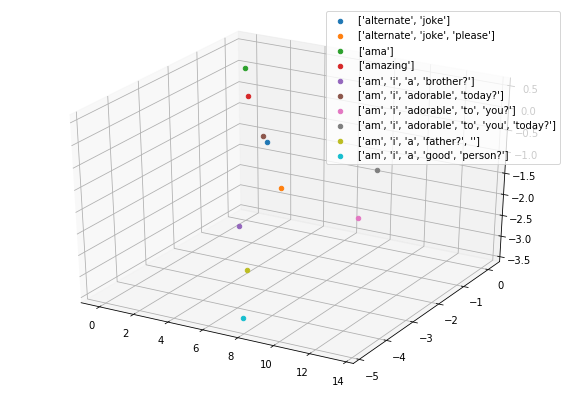

In [9]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
for i in range(50,60):
    ax.scatter3D(V[i][0],V[i][1],V[i][2],label=Q2W[i])
    #ax.scatter3D(V[i][0],V[i][1],V[i][2])
plt.legend()